1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

HERE IM TAKING AMAZON AS MY E-COMMERCE PLATFORM

In [1]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 7.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

In [3]:
macbook_air = []

In [7]:
import requests
from bs4 import BeautifulSoup as bs
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac 

In [8]:
macbook_air

['\n1)Screen: great.2)Keyboard & Trackpad: good and great.3)battery life: for web and coding=10+ hrs.  for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)Silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) Maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) Build quality= solid.9) Speakers = best front-facing surround sound speakers after M1 MacBook Pro(2021).\n',
 '\nMacbook always delivers as expected. Great product.\n',
 "\nValue for money laptopIf u r looking for programming this is the oneIt has better power efficiency,better screen quality, smooth & fast UI &  small in sizeM1 is  still better option...  M2  is good but  i think  there is no huge improvement between  m2 & m1  soo  if u hava 80k go for m1 mac instead of m2  if  u have high budget  go  for  pro model's dont go for basic ones\n",
 '\nLoved everything about this one. This one was a love at first sight but took me years 

In [9]:
len(macbook_air)

330

In [10]:
rev = {'review':macbook_air}

In [11]:
review_data = pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [12]:
review_data

,review
0,"\n1)Screen: great.2)Keyboard & Trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)Silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) Maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) Build quality= solid.9) Speakers = best front-facing surround sound speakers after M1 MacBook Pro(2021).\n"
1,\nMacbook always delivers as expected. Great product.\n
2,"\nValue for money laptopIf u r looking for programming this is the oneIt has better power efficiency,better screen quality, smooth & fast UI & small in sizeM1 is still better option... M2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
3,"\nLoved everything about this one. This one was a love at first sight but took me years to buy. I am really happy with the delivery and genuineness and it was worth it for INR 82,990. Thank you Amazon.\n"
4,\nHinge issues... Sometimes don't open by single handed... Rest everything is heaven\n
...,...
325,\nI am a student and using this for quite a time it’s absolutely a great laptop a beast in itself.I can do all my tasks without any worry for battery and i have to charge it once a day (i am a heavy user with screen time approx 8 hrs a day) overall you should buy it. The M1 chip made it more powerful than ever. I was using macbook air 2017 earlier. I changed it in and don’t regret.\n
326,"\nThe M1 processor is one of the fastest processor you can get. But if something goes wrong with this laptop after the warranty is over, you will need to buy a new one. Apple service centre will charge you around 70% of the value of the laptop for any small problem. They never repair the laptop, they only give you the option to replace the logic board for most of the problems. At that point, it will not make sense to pay this hefty amount, So will be forced to buy a new one.\n"
327,"\nbought macbook air m1 for 93k, sold my old car for it but worth it, now i have to walk 5 km to go to my working place daily, still worth not to spending 100 rs per litre petrol on my car\n"
328,\nWhatever you wanted from the laptop is right there. Performance is absolutely mind boggling. Solid build and easy to carry. Worth every penny you spent.\n


In [13]:
texts = ''.join(review_data)

In [15]:
import re
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [16]:
review_data

,review
0,"\n1)screen: great.2)keyboard & trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) build quality= solid.9) speakers = best front-facing surround sound speakers after m1 macbook pro(2021).\n"
1,\nmacbook always delivers as expected. great product.\n
2,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
3,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n"
4,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n
...,...
325,\ni am a student and using this for quite a time it’s absolutely a great laptop a beast in itself.i can do all my tasks without any worry for battery and i have to charge it once a day (i am a heavy user with screen time approx 8 hrs a day) overall you should buy it. the m1 chip made it more powerful than ever. i was using macbook air 2017 earlier. i changed it in and don’t regret.\n
326,"\nthe m1 processor is one of the fastest processor you can get. but if something goes wrong with this laptop after the warranty is over, you will need to buy a new one. apple service centre will charge you around 70% of the value of the laptop for any small problem. they never repair the laptop, they only give you the option to replace the logic board for most of the problems. at that point, it will not make sense to pay this hefty amount, so will be forced to buy a new one.\n"
327,"\nbought macbook air m1 for 93k, sold my old car for it but worth it, now i have to walk 5 km to go to my working place daily, still worth not to spending 100 rs per litre petrol on my car\n"
328,\nwhatever you wanted from the laptop is right there. performance is absolutely mind boggling. solid build and easy to carry. worth every penny you spent.\n


In [18]:
text = ''.join(review_data['review'])

In [19]:
text

'\n1)screen: great.2)keyboard & trackpad: good and great.3)battery life: for web and coding=10+ hrs.  for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) build quality= solid.9) speakers = best front-facing surround sound speakers after m1 macbook pro(2021).\n\nmacbook always delivers as expected. great product.\n\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui &  small in sizem1 is  still better option...  m2  is good but  i think  there is no huge improvement between  m2 & m1  soo  if u hava 80k go for m1 mac instead of m2  if  u have high budget  go  for  pro model\'s dont go for basic ones\n\nloved everything about this one. this one was a love at first sight but took me years to buy. i am re

In [21]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(text)

In [22]:
text_tokens

['1',
 ')',
 'screen',
 ':',
 'great.2',
 ')',
 'keyboard',
 '&',
 'trackpad',
 ':',
 'good',
 'and',
 'great.3',
 ')',
 'battery',
 'life',
 ':',
 'for',
 'web',
 'and',
 'coding=10+',
 'hrs',
 '.',
 'for',
 'video',
 'editing=4-5hrs.4',
 ')',
 'charging=1.5hrs5',
 ')',
 'webcam=bad.6',
 ')',
 'silent=',
 'so',
 'cool',
 'to',
 'operate',
 'that',
 'it',
 'does',
 'not',
 'heatup',
 'and',
 'due',
 'to',
 'this',
 ',',
 'it',
 'does',
 'not',
 'have',
 'any',
 'fan',
 'inside.7',
 ')',
 'maintenance',
 ':',
 'due',
 'to',
 'not',
 'having',
 'a',
 'fan',
 ',',
 'it',
 'does',
 'not',
 'pull',
 'any',
 'dust',
 'from',
 'the',
 'surrounding=',
 'great.8',
 ')',
 'build',
 'quality=',
 'solid.9',
 ')',
 'speakers',
 '=',
 'best',
 'front-facing',
 'surround',
 'sound',
 'speakers',
 'after',
 'm1',
 'macbook',
 'pro',
 '(',
 '2021',
 ')',
 '.',
 'macbook',
 'always',
 'delivers',
 'as',
 'expected',
 '.',
 'great',
 'product',
 '.',
 'value',
 'for',
 'money',
 'laptopif',
 'u',
 'r',
 

In [23]:
from nltk.corpus import stopwords
text_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [26]:
text_tf = tf.fit_transform(text_without_sw)

In [27]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns = feature_names)

/Users/nihadnazar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
df

,000,10,100,10hours,10k,11gb,11th,12,12hrs,12th,...,written,wrong,wtf,x86,year,years,you,youtube,yrs,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
word_list = ''.join(df)

In [60]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 440.6 kB/s eta 0:00:00a 0:00:01


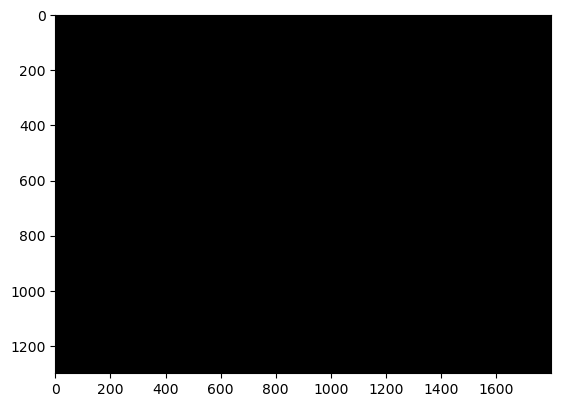

In [62]:
from wordcloud import WordCloud
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(word_list)
plt.imshow(wordcloud)

In [63]:
with open ("/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [65]:
with open ("/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/negative-words.txt","r",encoding= 'latin 1') as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:] 

In [66]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [67]:
pos_text=" ".join([word for word in df if not word  in positive_words])

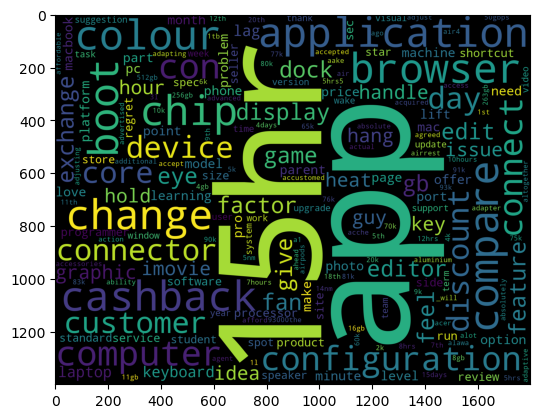

In [68]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

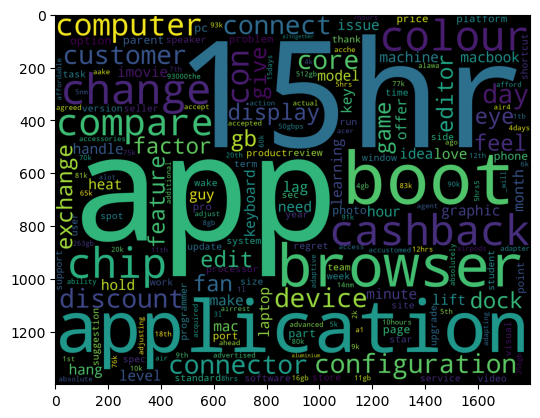

In [69]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [70]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [71]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity,analysis
0,"\n1)screen: great.2)keyboard & trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) build quality= solid.9) speakers = best front-facing surround sound speakers after m1 macbook pro(2021).\n",0.450000,0.366667,Positive
1,\nmacbook always delivers as expected. great product.\n,0.575000,0.350000,Positive
2,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333,Positive
3,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000,Positive
4,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n,0.357143,-0.035714,Negative
...,...,...,...,...
325,\ni am a student and using this for quite a time it’s absolutely a great laptop a beast in itself.i can do all my tasks without any worry for battery and i have to charge it once a day (i am a heavy user with screen time approx 8 hrs a day) overall you should buy it. the m1 chip made it more powerful than ever. i was using macbook air 2017 earlier. i changed it in and don’t regret.\n,0.541667,0.233333,Positive
326,"\nthe m1 processor is one of the fastest processor you can get. but if something goes wrong with this laptop after the warranty is over, you will need to buy a new one. apple service centre will charge you around 70% of the value of the laptop for any small problem. they never repair the laptop, they only give you the option to replace the logic board for most of the problems. at that point, it will not make sense to pay this hefty amount, so will be forced to buy a new one.\n",0.558442,-0.039610,Negative
327,"\nbought macbook air m1 for 93k, sold my old car for it but worth it, now i have to walk 5 km to go to my working place daily, still worth not to spending 100 rs per litre petrol on my car\n",0.100000,0.175000,Positive
328,\nwhatever you wanted from the laptop is right there. performance is absolutely mind boggling. solid build and easy to carry. worth every penny you spent.\n,0.428175,0.186508,Positive


In [72]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"\n1)screen: great.2)keyboard & trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) build quality= solid.9) speakers = best front-facing surround sound speakers after m1 macbook pro(2021).\n",0.450000,0.366667,Positive
1,\nmacbook always delivers as expected. great product.\n,0.575000,0.350000,Positive
2,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333,Positive
3,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000,Positive
4,\nhinge issues... sometimes don't open by single handed... rest everything is heaven\n,0.357143,-0.035714,Negative
...,...,...,...,...
325,\ni am a student and using this for quite a time it’s absolutely a great laptop a beast in itself.i can do all my tasks without any worry for battery and i have to charge it once a day (i am a heavy user with screen time approx 8 hrs a day) overall you should buy it. the m1 chip made it more powerful than ever. i was using macbook air 2017 earlier. i changed it in and don’t regret.\n,0.541667,0.233333,Positive
326,"\nthe m1 processor is one of the fastest processor you can get. but if something goes wrong with this laptop after the warranty is over, you will need to buy a new one. apple service centre will charge you around 70% of the value of the laptop for any small problem. they never repair the laptop, they only give you the option to replace the logic board for most of the problems. at that point, it will not make sense to pay this hefty amount, so will be forced to buy a new one.\n",0.558442,-0.039610,Negative
327,"\nbought macbook air m1 for 93k, sold my old car for it but worth it, now i have to walk 5 km to go to my working place daily, still worth not to spending 100 rs per litre petrol on my car\n",0.100000,0.175000,Positive
328,\nwhatever you wanted from the laptop is right there. performance is absolutely mind boggling. solid build and easy to carry. worth every penny you spent.\n,0.428175,0.186508,Positive


In [73]:
review_data['analysis'].value_counts()

Positive    258
Neutral      46
Negative     26
Name: analysis, dtype: int64

In [74]:
#positive comments
((228+33)/280)*100

93.21428571428572

In [75]:
#negative comments
(19/199)*100


9.547738693467336

• Only 9.54% is negative comments

• Hence the Macbook air product received good reviews from users